In [1]:
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df=pd.read_excel(r"C:\Users\hp\Documents\ToyotaCorolla.xls",sheet_name='data',nrows=1437)

In [3]:
df.tail()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0
1435,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,...,0,0,1,0,0,0,0,0,0,0


In [4]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [6]:
df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [8]:
df.shape

(1436, 38)

In [9]:
df.describe(include=['object'])

,Model,Fuel_Type,Color
count,1436,1436,1436
unique,372,3,10
top,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,Petrol,Grey
freq,107,1264,301


In [10]:
df.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

NO missing values

In [11]:
df.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [12]:
duplicateRowsDF = df[df.duplicated()]
print(duplicateRowsDF)

Empty DataFrame
Columns: [Id, Model, Price, Age_08_04, Mfg_Month, Mfg_Year, KM, Fuel_Type, HP, Met_Color, Color, Automatic, cc, Doors, Cylinders, Gears, Quarterly_Tax, Weight, Mfr_Guarantee, BOVAG_Guarantee, Guarantee_Period, ABS, Airbag_1, Airbag_2, Airco, Automatic_airco, Boardcomputer, CD_Player, Central_Lock, Powered_Windows, Power_Steering, Radio, Mistlamps, Sport_Model, Backseat_Divider, Metallic_Rim, Radio_cassette, Tow_Bar]
Index: []

[0 rows x 38 columns]


NO duplicate rows

Outliers visualization through boxplot

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35]),
 [Text(1, 0, 'Id'),
  Text(2, 0, 'Price'),
  Text(3, 0, 'Age_08_04'),
  Text(4, 0, 'Mfg_Month'),
  Text(5, 0, 'Mfg_Year'),
  Text(6, 0, 'KM'),
  Text(7, 0, 'HP'),
  Text(8, 0, 'Met_Color'),
  Text(9, 0, 'Automatic'),
  Text(10, 0, 'cc'),
  Text(11, 0, 'Doors'),
  Text(12, 0, 'Cylinders'),
  Text(13, 0, 'Gears'),
  Text(14, 0, 'Quarterly_Tax'),
  Text(15, 0, 'Weight'),
  Text(16, 0, 'Mfr_Guarantee'),
  Text(17, 0, 'BOVAG_Guarantee'),
  Text(18, 0, 'Guarantee_Period'),
  Text(19, 0, 'ABS'),
  Text(20, 0, 'Airbag_1'),
  Text(21, 0, 'Airbag_2'),
  Text(22, 0, 'Airco'),
  Text(23, 0, 'Automatic_airco'),
  Text(24, 0, 'Boardcomputer'),
  Text(25, 0, 'CD_Player'),
  Text(26, 0, 'Central_Lock'),
  Text(27, 0, 'Powered_Windows'),
  Text(28, 0, 'Power_Steering'),
  Text(29, 0, 'Radio'),
  Text(30, 0, 'Mistlamps'),
  Text(31, 0, 'Spo

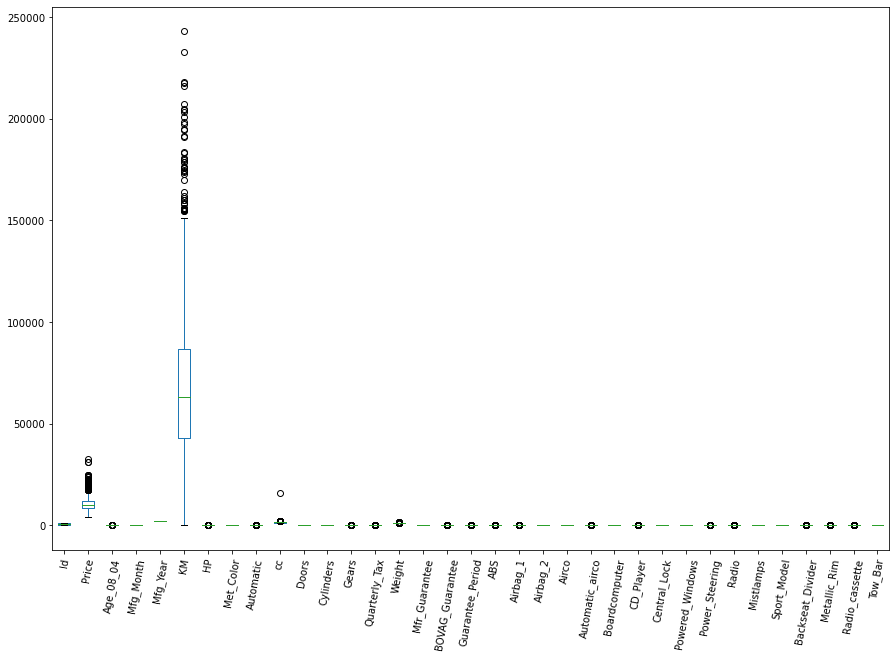

In [13]:
df.plot(kind='box',figsize=(15,10))
plt.xticks(rotation=80)

The purpose of this EDA is to find insights which will serve us later  for Data cleaning/preparation/transformation which will ultimately be used into a machine learning algorithm.

In [14]:
#univariate analysis

In [15]:
df['Color'].value_counts(sort=True).to_frame()

,Color
Grey,301
Blue,283
Red,278
Green,220
Black,191
Silver,122
White,31
Violet,4
Beige,3
Yellow,3


In [16]:
df['Fuel_Type'].value_counts(sort=True).to_frame()

,Fuel_Type
Petrol,1264
Diesel,155
CNG,17


In [17]:
df['Model'].value_counts(sort=True).to_frame()

,Model
TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-Doors,107
TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors,83
TOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-Doors,79
TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-Doors,70
TOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-Doors,43
...,...
TOYOTA Corolla 1.6 16v VVTi Linea Sol 4/5-Doors,1
TOYOTA Corolla 1.6 16V VVT I 5DR EXEC BNS 4/5-Doors,1
TOYOTA Corolla 1.6 VVT-I 5DR LINEA SOL 4/5-Doors,1
TOYOTA Corolla 1.6 16v Liftback Linea So 4/5-Doors,1


In [18]:
df['Price'].value_counts(sort=True,bins=10).to_frame()

,Price
"(7165.0, 9980.0]",707
"(9980.0, 12795.0]",342
"(12795.0, 15610.0]",114
"(4321.849, 7165.0]",110
"(15610.0, 18425.0]",75
"(18425.0, 21240.0]",59
"(21240.0, 24055.0]",22
"(24055.0, 26870.0]",4
"(29685.0, 32500.0]",3
"(26870.0, 29685.0]",0


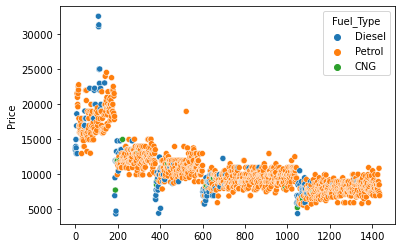

In [19]:
sn.scatterplot(x=df.index,y=df['Price'],hue=df['Fuel_Type'])
plt.show()

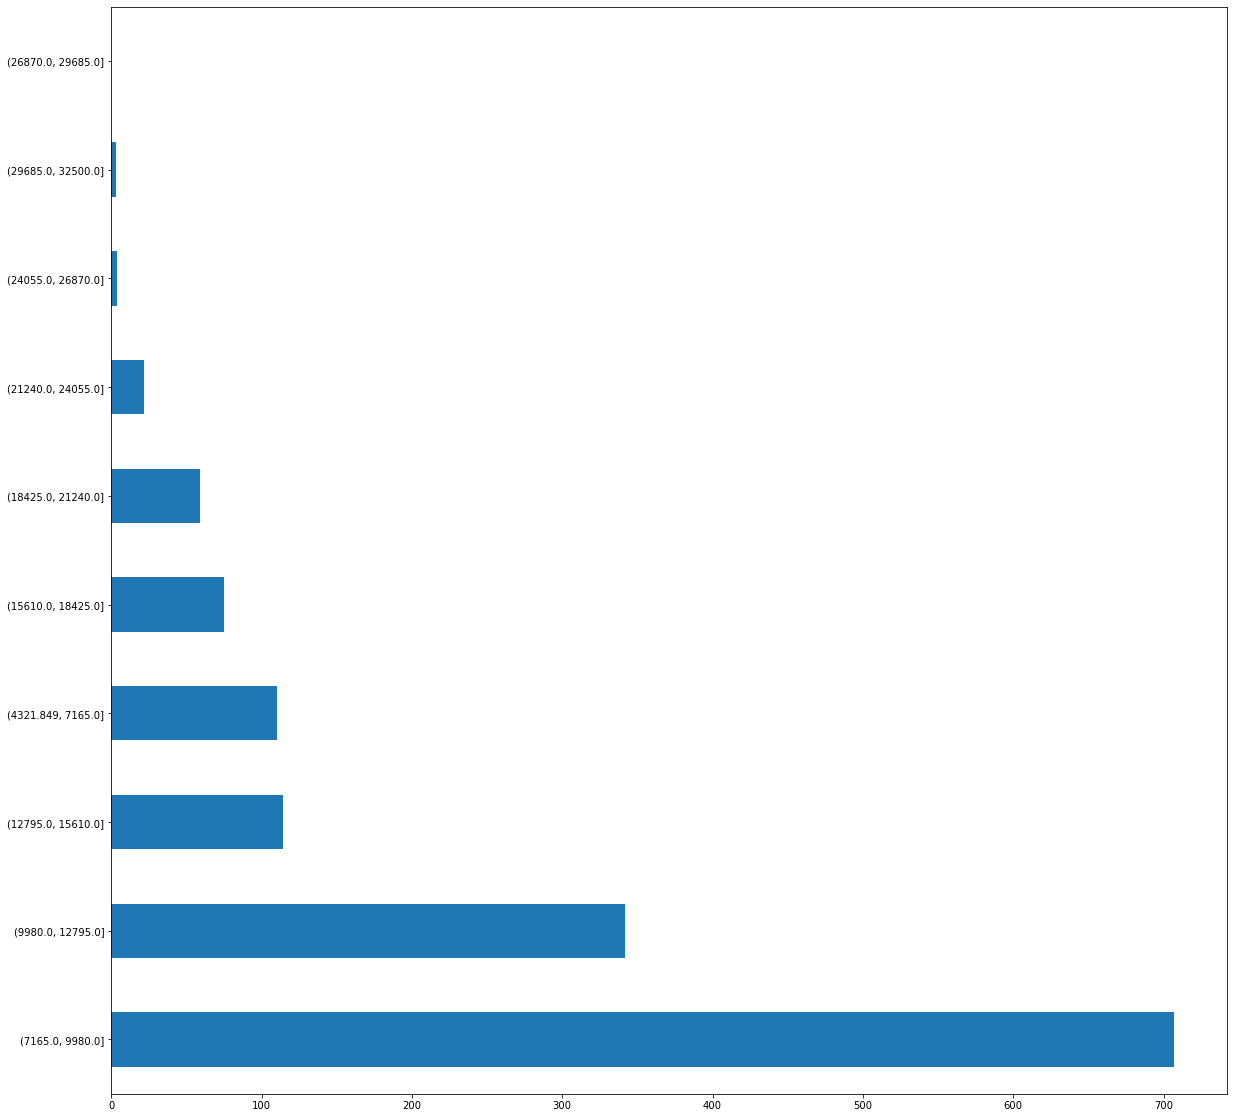

In [20]:
fig= plt.figure(figsize=(20,20))
df['Price'].value_counts(sort=True,bins=10).plot.barh()
plt.show()

In [21]:
df['KM'].value_counts(sort=True,bins=10).to_frame()

,KM
"(48600.8, 72900.7]",417
"(24300.9, 48600.8]",331
"(72900.7, 97200.6]",301
"(97200.6, 121500.5]",140
"(-242.0, 24300.9]",122
"(121500.5, 145800.4]",64
"(145800.4, 170100.3]",30
"(170100.3, 194400.2]",17
"(194400.2, 218700.1]",12
"(218700.1, 243000.0]",2


<AxesSubplot:>

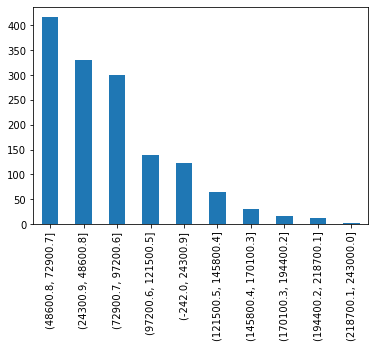

In [22]:
df['KM'].value_counts(sort=True,bins=10).plot.bar()

In [23]:
df['cc'].value_counts(sort=True,bins=5).to_frame()

,cc
"(1285.299, 4240.0]",1435
"(13060.0, 16000.0]",1
"(10120.0, 13060.0]",0
"(7180.0, 10120.0]",0
"(4240.0, 7180.0]",0


<AxesSubplot:>

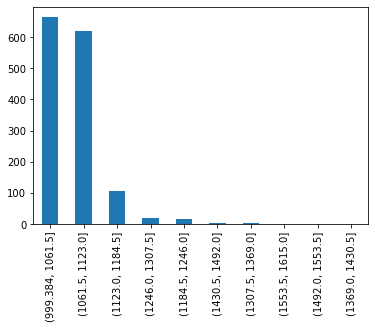

In [24]:
df['Weight'].value_counts(sort=True,bins=10).plot.bar()

Bivariate Analysis

Scatterplot of target variable 'Price' with other numeric columns

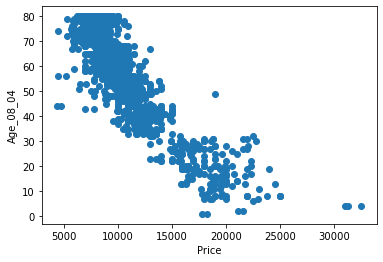

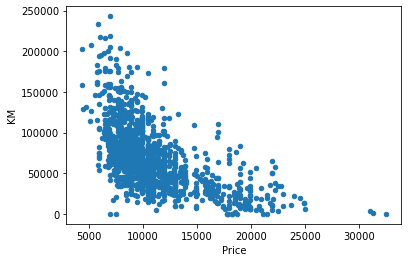

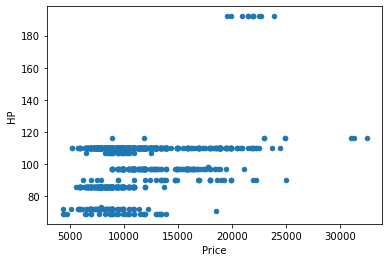

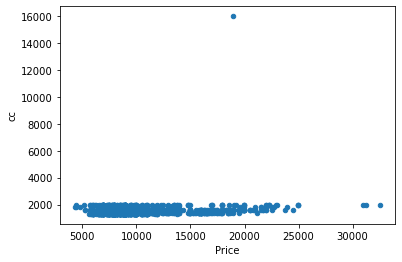

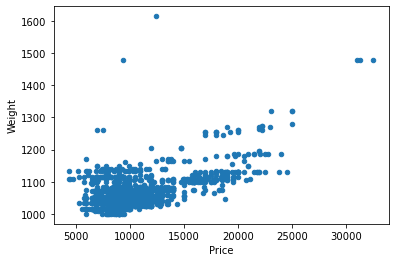

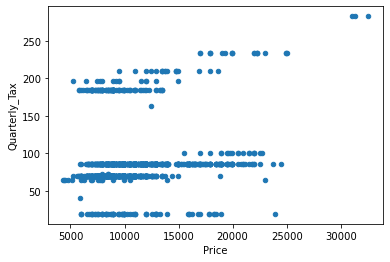

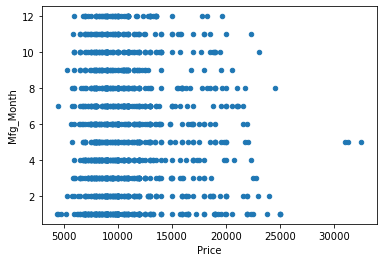

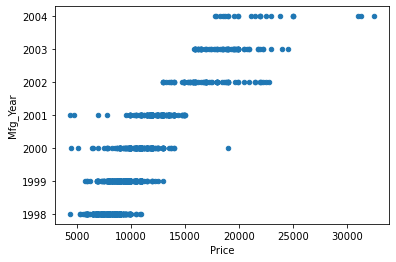

In [25]:
plt.scatter(df['Price'],df['Age_08_04'])
plt.xlabel("Price")
plt.ylabel("Age_08_04")
plt.show()

df.plot.scatter(x="Price",y="KM")
plt.show()

df.plot.scatter(x='Price',y="HP")
plt.show()

df.plot.scatter(x='Price',y="cc")
plt.show()

df.plot.scatter(x='Price',y="Weight")
plt.show()

df.plot.scatter(x='Price',y="Quarterly_Tax")
plt.show()

df.plot.scatter(x='Price',y="Mfg_Month")
plt.show()

df.plot.scatter(x='Price',y="Mfg_Year")
plt.show()


In [26]:
# Price relationship with categorical columns 


In [27]:
df.groupby('Fuel_Type')['Price'].mean().sort_values(ascending=False).to_frame()

,Price
Fuel_Type,
Diesel,11294.554839
Petrol,10679.310127
CNG,9421.176471


<AxesSubplot:xlabel='Fuel_Type'>

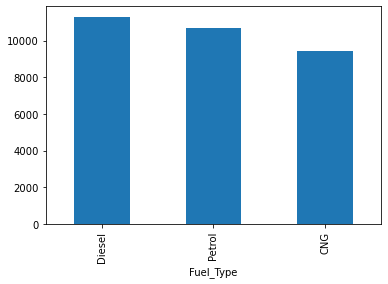

In [28]:
df.groupby('Fuel_Type')['Price'].mean().sort_values(ascending=False).plot.bar()

In [29]:
df.groupby('Color')['Price'].mean().sort_values(ascending=False).to_frame()

,Price
Color,
Yellow,12531.666667
Grey,11927.342193
Silver,11070.680328
Black,11053.848168
Blue,10836.438163
Red,9962.697842
Green,9836.109091
Violet,9575.000000
Beige,8933.333333


<AxesSubplot:xlabel='Color'>

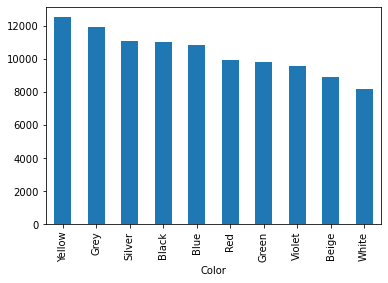

In [30]:
df.groupby('Color')['Price'].mean().sort_values(ascending=False).plot.bar()

In [31]:
df.drop(['Id'],axis=1).corr()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Price,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,0.185326,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,-0.148359,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,-0.012069,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,0.151442,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,-0.036197,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,0.092424,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,0.085243,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,-0.027654,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,0.079903,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725
Doors,0.185326,-0.148359,-0.012069,0.151442,-0.036197,0.092424,0.085243,-0.027654,0.079903,1.000000,...,0.132092,0.107626,0.059792,-0.008318,0.064705,-0.129881,-0.022542,-0.039555,-0.008265,0.102292


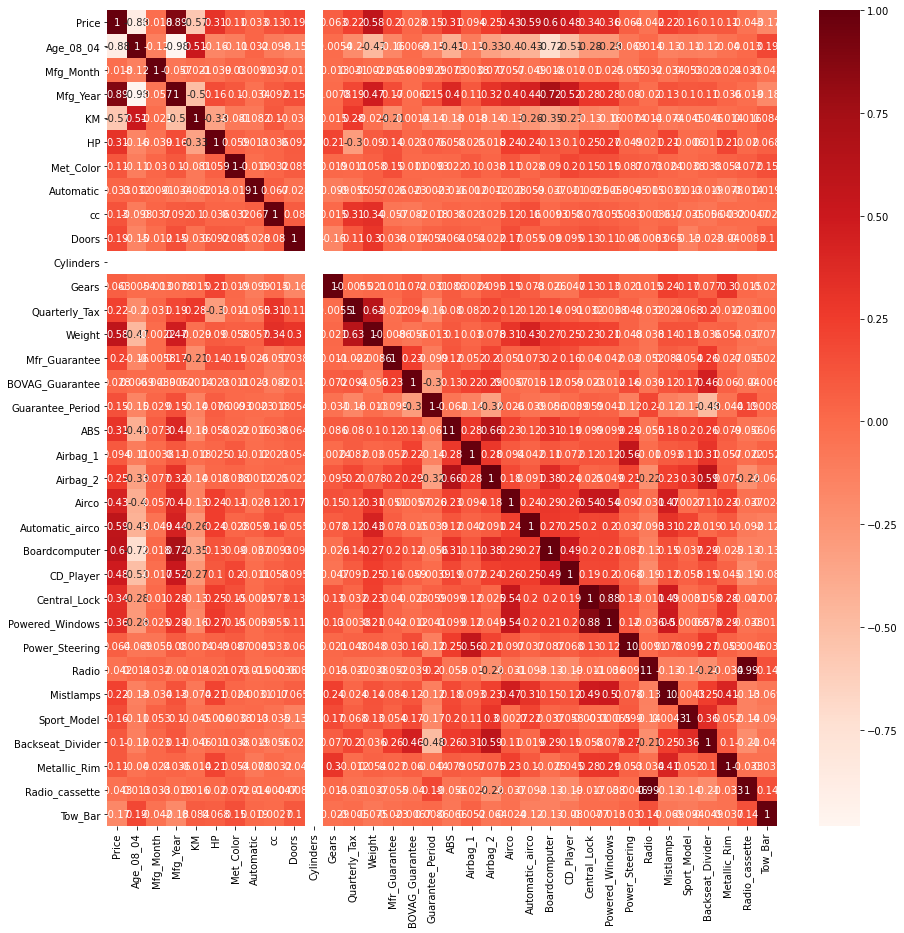

In [32]:
plt.figure(figsize=(15,15))
heat_map = sn.heatmap(df.drop(['Id'],axis=1).corr() ,annot=True, cmap = 'Reds')

plt.show()

In [33]:
# important features for different model types 

In [34]:
df_model1=df[df['Fuel_Type']=='Petrol']

In [35]:
df_model2=df[df['Fuel_Type']=='Diesel']

In [36]:
df_model3=df[df['Fuel_Type']=='CNG']

In [37]:
df_model1.drop(['Id'],axis=1).corr()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Price,1.000000,-0.894556,-0.006677,0.904248,-0.618387,0.341176,0.089420,0.045561,0.131026,0.194095,...,0.344854,0.347958,0.069693,-0.031923,0.249307,0.156542,0.095168,0.114518,-0.033530,-0.176230
Age_08_04,-0.894556,1.000000,-0.142094,-0.983500,0.601164,-0.189916,-0.097826,0.025362,-0.077692,-0.155401,...,-0.262715,-0.269706,-0.068600,0.015552,-0.137037,-0.117597,-0.119619,-0.042112,0.014553,0.178212
Mfg_Month,-0.006677,-0.142094,1.000000,-0.039324,-0.045879,-0.004011,0.027449,0.009372,0.022424,0.001350,...,0.039995,0.057425,-0.060209,0.030015,-0.020249,0.051789,0.014063,0.043359,0.031093,-0.038859
Mfg_Year,0.904248,-0.983500,-0.039324,1.000000,-0.598472,0.192447,0.093736,-0.027315,0.074329,0.156626,...,0.257894,0.261765,0.080254,-0.021185,0.142036,0.109246,0.118182,0.034586,-0.020373,-0.172798
KM,-0.618387,0.601164,-0.045879,-0.598472,1.000000,-0.080712,-0.050966,-0.055480,-0.043892,-0.061859,...,-0.094851,-0.089537,0.004247,0.021496,-0.051231,-0.028005,-0.022605,0.027848,0.024045,0.121151
HP,0.341176,-0.189916,-0.004011,0.192447,-0.080712,1.000000,0.048698,-0.040356,0.274015,0.123109,...,0.247902,0.234143,0.071526,0.045560,0.198330,-0.033044,-0.007613,0.199459,0.044639,0.065918
Met_Color,0.089420,-0.097826,0.027449,0.093736,-0.050966,0.048698,1.000000,-0.023563,0.039886,0.081191,...,0.145371,0.137272,0.080702,0.075154,0.026376,0.008093,0.045487,0.047745,0.073766,0.160159
Automatic,0.045561,0.025362,0.009372,-0.027315,-0.055480,-0.040356,-0.023563,1.000000,0.101070,-0.027039,...,-0.009963,-0.017787,-0.002684,-0.013901,-0.002759,0.013306,-0.019676,-0.086722,-0.013352,0.018104
cc,0.131026,-0.077692,0.022424,0.074329,-0.043892,0.274015,0.039886,0.101070,1.000000,0.081851,...,0.102408,0.097392,0.027130,0.001161,0.048631,-0.037951,-0.049852,0.030591,0.000782,0.021857
Doors,0.194095,-0.155401,0.001350,0.156626,-0.061859,0.123109,0.081191,-0.027039,0.081851,1.000000,...,0.135697,0.117224,0.058488,-0.000865,0.072744,-0.146462,-0.010716,-0.045441,-0.000811,0.094758


In [38]:
df_model2.drop(['Id'],axis=1).corr()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Price,1.000000,-0.860402,-0.084871,0.857198,-0.746502,0.796787,0.220388,NaN,0.162950,0.158192,...,0.409036,0.500523,0.045470,-0.094508,0.150792,0.221596,0.133102,0.184983,-0.094508,-0.186530
Age_08_04,-0.860402,1.000000,0.034524,-0.985327,0.704638,-0.678076,-0.198127,NaN,0.129000,-0.079372,...,-0.487459,-0.525028,-0.062671,0.017979,-0.141595,-0.086100,-0.105011,-0.170318,0.017979,0.275717
Mfg_Month,-0.084871,0.034524,1.000000,-0.204593,-0.041815,-0.091698,0.043197,NaN,0.064917,-0.145859,...,-0.203506,-0.156199,-0.030432,0.045337,-0.114761,0.055895,0.128306,-0.077538,0.045337,-0.108616
Mfg_Year,0.857198,-0.985327,-0.204593,1.000000,-0.683003,0.679789,0.186675,NaN,-0.137433,0.102650,...,0.512187,0.540904,0.066579,-0.025351,0.158281,0.074783,0.080939,0.180056,-0.025351,-0.251496
KM,-0.746502,0.704638,-0.041815,-0.683003,1.000000,-0.576137,-0.250807,NaN,-0.063006,-0.011227,...,-0.220218,-0.337424,-0.061805,-0.040799,-0.000710,-0.074035,-0.036045,-0.107758,-0.040799,0.116436
HP,0.796787,-0.678076,-0.091698,0.679789,-0.576137,1.000000,0.159432,NaN,0.369226,0.146566,...,0.416943,0.471256,0.067608,-0.132900,0.228329,0.162187,-0.024848,0.177558,-0.132900,-0.147765
Met_Color,0.220388,-0.198127,0.043197,0.186675,-0.250807,0.159432,1.000000,NaN,0.016684,0.091838,...,0.218003,0.217157,0.158610,0.071336,0.007762,-0.028803,-0.021362,0.133929,0.071336,0.065253
Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,0.162950,0.129000,0.064917,-0.137433,-0.063006,0.369226,0.016684,NaN,1.000000,-0.092587,...,-0.126873,-0.045840,0.065249,-0.189455,0.062428,0.317398,0.132137,0.007415,-0.189455,0.077249
Doors,0.158192,-0.079372,-0.145859,0.102650,-0.011227,0.146566,0.091838,NaN,-0.092587,1.000000,...,0.146051,0.096268,0.071968,-0.044963,0.009725,0.021771,-0.158805,0.087035,-0.044963,0.177916


In [39]:
df_model3.drop(['Id'],axis=1).corr()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Price,1.000000,-0.771231,-0.064210,0.782311,-0.715741,NaN,0.216509,-0.152125,0.202792,0.212191,...,0.064180,-0.081920,NaN,-0.035966,0.069341,-0.048721,0.407268,-0.420895,-0.035966,0.323895
Age_08_04,-0.771231,1.000000,-0.110193,-0.959608,0.464487,NaN,-0.092081,0.031836,-0.457073,-0.225957,...,0.170687,0.289968,NaN,-0.179653,-0.024562,0.051165,-0.522389,0.588930,-0.179653,-0.216892
Mfg_Month,-0.064210,-0.110193,1.000000,-0.173884,-0.184883,NaN,0.163362,0.366142,0.310425,0.191483,...,0.133190,-0.136955,NaN,0.009826,-0.031933,0.298485,-0.157925,-0.250818,0.009826,0.416693
Mfg_Year,0.782311,-0.959608,-0.173884,1.000000,-0.407880,NaN,0.044992,-0.135185,0.364998,0.169676,...,-0.206818,-0.248534,NaN,0.175219,0.033375,-0.135185,0.562286,-0.512514,0.175219,0.096946
KM,-0.715741,0.464487,-0.184883,-0.407880,1.000000,NaN,-0.240778,-0.428053,0.037014,-0.201239,...,-0.241968,-0.152353,NaN,0.169555,-0.072404,0.109689,-0.012366,0.280209,0.169555,-0.083313
HP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Met_Color,0.216509,-0.092081,0.163362,0.044992,-0.240778,NaN,1.000000,0.138675,0.450694,0.380750,...,0.099449,0.032686,NaN,-0.106990,-0.106990,0.138675,0.099449,-0.170697,-0.106990,-0.099449
Automatic,-0.152125,0.031836,0.366142,-0.135185,-0.428053,NaN,0.138675,1.000000,0.062500,-0.032686,...,0.209165,0.235702,NaN,-0.115728,-0.115728,-0.062500,-0.298807,-0.184637,-0.115728,-0.209165
cc,0.202792,-0.457073,0.310425,0.364998,0.037014,NaN,0.450694,0.062500,1.000000,0.310517,...,-0.209165,-0.235702,NaN,0.115728,0.115728,0.062500,0.298807,-0.338502,0.115728,0.209165
Doors,0.212191,-0.225957,0.191483,0.169676,-0.201239,NaN,0.380750,-0.032686,0.310517,1.000000,...,-0.156269,-0.269646,NaN,-0.232004,0.110958,-0.310517,0.507875,-0.370150,-0.232004,0.156269


Corelations with target variable 'Price'

In [40]:
corr_matrix = df.corr()
print(corr_matrix["Price"].sort_values(ascending=False))


Price               1.000000
Mfg_Year            0.885159
Boardcomputer       0.601292
Automatic_airco     0.588262
Weight              0.581198
CD_Player           0.481374
Airco               0.429259
Powered_Windows     0.356518
Central_Lock        0.343458
HP                  0.314990
ABS                 0.306138
Airbag_2            0.248974
Mistlamps           0.222083
Quarterly_Tax       0.219197
Mfr_Guarantee       0.197802
Doors               0.185326
Sport_Model         0.164121
Guarantee_Period    0.146627
cc                  0.126389
Met_Color           0.108905
Metallic_Rim        0.108564
Backseat_Divider    0.102569
Airbag_1            0.093588
Power_Steering      0.064275
Gears               0.063104
Automatic           0.033081
BOVAG_Guarantee     0.028133
Mfg_Month          -0.018138
Radio              -0.041887
Radio_cassette     -0.043179
Tow_Bar            -0.172369
KM                 -0.569960
Id                 -0.738250
Age_08_04          -0.876590
Cylinders     

In [41]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

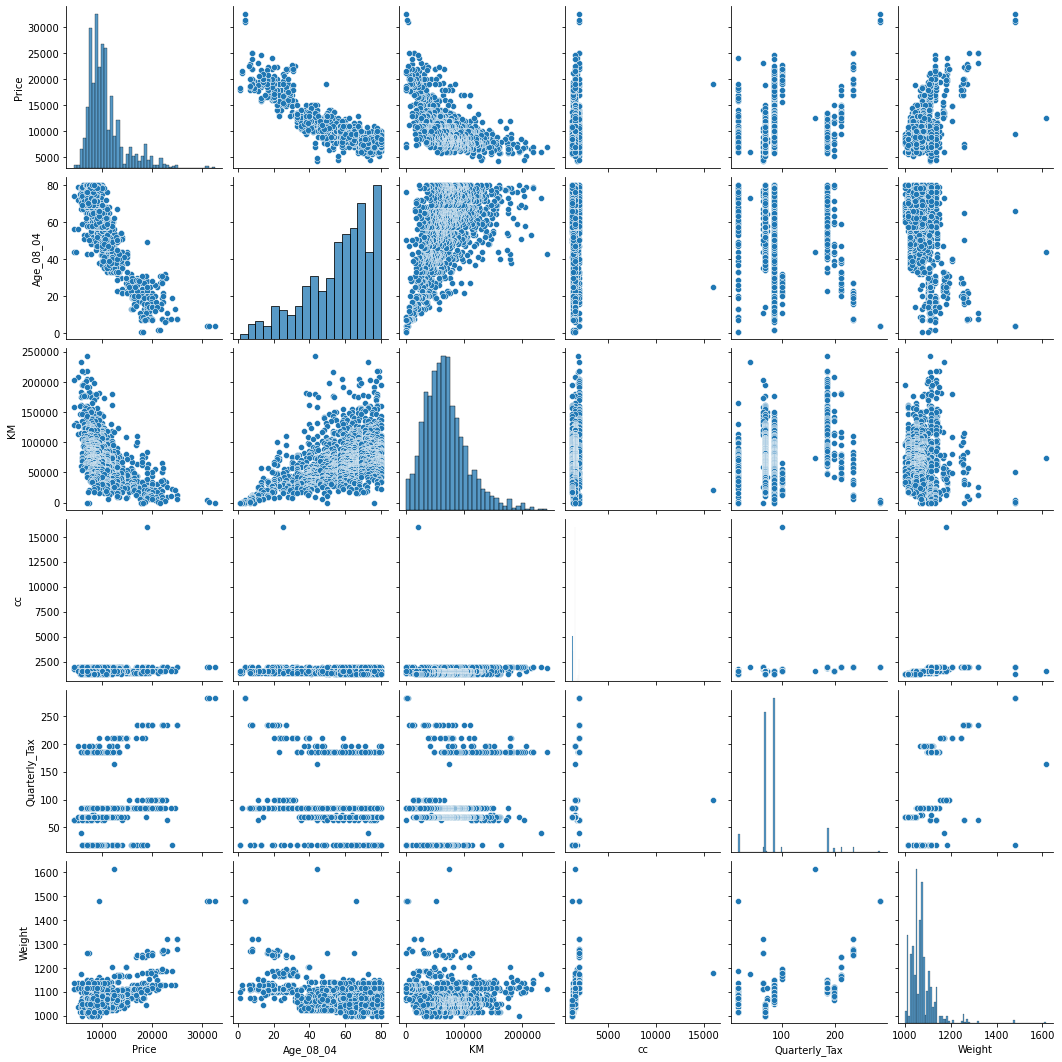

In [42]:
sn.pairplot(df,vars=['Price','Age_08_04','KM','cc','Quarterly_Tax','Weight'])

In [43]:
# model building


In [44]:
df1=pd.read_excel(r"C:\Users\hp\Documents\ToyotaCorolla.xls",sheet_name='data',nrows=1437)

In [45]:
# encoding to numerical for all

In [46]:
df1=df1.drop(['Model'],axis=1)

In [47]:
df1=df1.drop(['Id'],axis=1)

In [48]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
df1['Color']= label_encoder.fit_transform(df1['Color']) 
df1['Fuel_Type']= label_encoder.fit_transform(df1['Fuel_Type']) 
print(df1.head())

   Price  Age_08_04  Mfg_Month  Mfg_Year     KM  Fuel_Type  HP  Met_Color  \
0  13500         23         10      2002  46986          1  90          1   
1  13750         23         10      2002  72937          1  90          1   
2  13950         24          9      2002  41711          1  90          1   
3  14950         26          7      2002  48000          1  90          0   
4  13750         30          3      2002  38500          1  90          0   

   Color  Automatic  ...  Central_Lock  Powered_Windows  Power_Steering  \
0      2          0  ...             1                1               1   
1      6          0  ...             1                0               1   
2      2          0  ...             0                0               1   
3      1          0  ...             0                0               1   
4      1          0  ...             1                1               1   

   Radio  Mistlamps  Sport_Model  Backseat_Divider  Metallic_Rim  \
0      0          

In [49]:
def cap_data(df1):
    for col in df1.columns:
        print("capping the ",col)
        if (((df1[col].dtype)=='float64') | ((df1[col].dtype)=='int64')):
            percentiles = df1[col].quantile([0.01,0.99]).values
            df1[col][df[col] <= percentiles[0]] = percentiles[0]
            df1[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df1[col]=df1[col]
    return df

df1_capped=cap_data(df1)

capping the  Price
capping the  Age_08_04
capping the  Mfg_Month
capping the  Mfg_Year
capping the  KM
capping the  Fuel_Type
capping the  HP
capping the  Met_Color
capping the  Color
capping the  Automatic
capping the  cc
capping the  Doors
capping the  Cylinders
capping the  Gears
capping the  Quarterly_Tax
capping the 

<ipython-input-49-e377e810a51d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col][df[col] <= percentiles[0]] = percentiles[0]
<ipython-input-49-e377e810a51d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col][df[col] >= percentiles[1]] = percentiles[1]
<ipython-input-49-e377e810a51d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col][df[col] <= percentiles[0]] = percentiles[0]
<ipython-input-49-e377e810a51d>:6: Se

 Weight
capping the  Mfr_Guarantee
capping the  BOVAG_Guarantee
capping the  Guarantee_Period
capping the  ABS
capping the  Airbag_1
capping the  Airbag_2
capping the  Airco
capping the  Automatic_airco
capping the  Boardcomputer
capping the  CD_Player
capping the  Central_Lock
capping the  Powered_Windows
capping the  Power_Steering
capping the 

<ipython-input-49-e377e810a51d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col][df[col] <= percentiles[0]] = percentiles[0]
<ipython-input-49-e377e810a51d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col][df[col] >= percentiles[1]] = percentiles[1]
<ipython-input-49-e377e810a51d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col][df[col] <= percentiles[0]] = percentiles[0]
<ipython-input-49-e377e810a51d>:6: Se

 Radio
capping the  Mistlamps
capping the  Sport_Model
capping the  Backseat_Divider
capping the  Metallic_Rim
capping the  Radio_cassette
capping the  Tow_Bar


<ipython-input-49-e377e810a51d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col][df[col] <= percentiles[0]] = percentiles[0]
<ipython-input-49-e377e810a51d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col][df[col] <= percentiles[0]] = percentiles[0]
<ipython-input-49-e377e810a51d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col][df[col] <= percentiles[0]] = percentiles[0]
<ipython-input-49-e377e810a51d>:6: Se

In [50]:
df1.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500.0,23,10,2002,46986.0,1,90,1,2,0,...,1,1,1,0,0,0,1,0,0,0
1,13750.0,23,10,2002,72937.0,1,90,1,6,0,...,1,0,1,0,0,0,1,0,0,0
2,13950.0,24,9,2002,41711.0,1,90,1,2,0,...,0,0,1,0,0,0,1,0,0,0
3,14950.0,26,7,2002,48000.0,1,90,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,13750.0,30,3,2002,38500.0,1,90,0,1,0,...,1,1,1,0,1,0,1,0,0,0


In [51]:
df1.corr()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Price,1.000000,-0.886844,-0.016370,0.895761,-0.577387,-0.009687,0.228867,0.111076,-0.055015,0.036089,...,0.350183,0.361964,0.065763,-0.042417,0.220693,0.160667,0.103647,0.107315,-0.043771,-0.174622
Age_08_04,-0.886844,1.000000,-0.123573,-0.983385,0.510373,0.079914,-0.112393,-0.108035,0.029735,0.031452,...,-0.279479,-0.283669,-0.069255,0.013154,-0.126581,-0.110392,-0.117706,-0.039690,0.012218,0.188539
Mfg_Month,-0.016370,-0.123573,1.000000,-0.057416,-0.019030,-0.043774,-0.037436,0.030266,-0.035049,0.009146,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,0.895761,-0.983385,-0.057416,1.000000,-0.510585,-0.072803,0.120263,0.103310,-0.023532,-0.033567,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,-0.577387,0.510373,-0.019030,-0.510585,1.000000,-0.417190,-0.345546,-0.078052,0.036197,-0.082540,...,-0.126788,-0.156909,0.006969,0.012418,-0.076334,-0.042974,-0.046934,-0.014065,0.014558,0.085940
Fuel_Type,-0.009687,0.079914,-0.043774,-0.072803,-0.417190,1.000000,0.464426,-0.001859,-0.058285,0.069718,...,0.040401,0.080161,-0.028092,-0.007220,0.079659,0.043877,0.060458,0.040399,-0.007934,0.027266
HP,0.228867,-0.112393,-0.037436,0.120263,-0.345546,0.464426,1.000000,0.081506,-0.042552,0.026509,...,0.254744,0.271440,0.050447,0.008312,0.207527,-0.031495,0.027316,0.152775,0.006924,0.108430
Met_Color,0.111076,-0.108035,0.030266,0.103310,-0.078052,-0.001859,0.081506,1.000000,-0.167835,-0.019335,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Color,-0.055015,0.029735,-0.035049,-0.023532,0.036197,-0.058285,-0.042552,-0.167835,1.000000,0.010509,...,-0.075589,-0.076544,-0.020958,0.063828,-0.134614,-0.084437,-0.124984,-0.095493,0.068035,0.023717
Automatic,0.036089,0.031452,0.009146,-0.033567,-0.082540,0.069718,0.026509,-0.019335,0.010509,1.000000,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786


In [52]:
y1=df1['Price']
x1=df1[['Age_08_04','KM','Weight','Automatic_airco','Boardcomputer','CD_Player']]

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3)

In [54]:
model = LinearRegression()

In [55]:
model.fit(x_train,y_train)

LinearRegression()

In [56]:
# coefficeints of the trained model
print('\nCoefficient of model :', model.coef_)


Coefficient of model : [-1.13973920e+02 -2.02108344e-02  1.50332987e+01  2.35412264e+03
 -2.57131138e+02  3.26164573e+02]


In [57]:
# intercept of the model
print('\nIntercept of model',model.intercept_)


Intercept of model 2228.7280004971417


In [58]:
# predict the target on the traing dataset
predict_train = model.predict(x_train)
print('\n pricing on training data',predict_train) 


 pricing on training data [ 7531.1725018  10423.07682328 13497.14093833 ...  6902.82594014
 13797.29843476 17553.34676974]


In [59]:
# Root Mean Squared Error on training dataset
rmse_train = mean_squared_error(y_train,predict_train)**(0.5)
print('\nRMSE on train dataset : ', rmse_train)


RMSE on train dataset :  1138.1042888051745


In [60]:
# predict the target on the testing dataset
predict_test = model.predict(x_test)
print('\n pricing on test data',predict_test) 


 pricing on test data [16655.61914317 10704.29802171  7409.08746553 12888.43764816
 10727.4402602  16443.5450174  10734.63253097 13443.40345025
  8073.59144334 12698.9200039   8738.01525882 10266.83451112
  9164.01079404 10313.35789873  9904.31048681 10885.13731544
 22642.99019311 10882.86520811  8763.87629079  8496.30568351
 18122.95739775  9669.19517691 19088.33887296 12705.43468535
 12502.47926509 10776.70865932 12810.44431109  9324.12945642
 14228.47324308  7684.97679917 15684.71695239  9741.87165712
 10215.59466209  8332.91665953 13644.82538874  9698.46793933
  7625.65671793 11091.86840713 12847.43762461  9240.06874114
  9249.87979101 15384.07126698 11081.38828814 13050.4028579
 12988.13545392 20639.80313932 11708.63557178  8935.67587745
  7668.22542519  9365.17358054 10108.87718927 19459.4451897
 18129.36163661  9997.59135979  7383.93457846 10259.69568371
 12283.4677967  17583.68345581  8464.59594297 15120.86706196
 12876.12411272 12626.87077971  9560.73590377  7225.20393514
  9

In [61]:
# Root Mean Squared Error on testing dataset
rmse_test = mean_squared_error(y_test,predict_test)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)


RMSE on test dataset :  1364.0841047652655


In [62]:
# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_test,predict_test))
print(metrics.mean_squared_error(y_test,predict_test))
print(np.sqrt(metrics.mean_squared_error(y_test,predict_test)))

996.8364416762954
1860725.4448732554
1364.0841047652655


In [63]:
model.score(x_test,y_test)

0.8688034768486235

Feature: 0, Score: -113.97392
Feature: 1, Score: -0.02021
Feature: 2, Score: 15.03330
Feature: 3, Score: 2354.12264
Feature: 4, Score: -257.13114
Feature: 5, Score: 326.16457


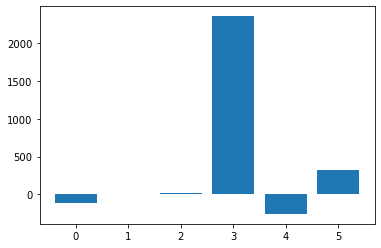

In [64]:
importance=model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [65]:
features_model={0:'Age_08_04',1:'KM',2:'Weight',3:'Automatic_airco',4:'Boardcomputer',5:'CD_Player'}
for key,value in features_model.items():
    print(key,"is",value)

0 is Age_08_04
1 is KM
2 is Weight
3 is Automatic_airco
4 is Boardcomputer
5 is CD_Player


sample price predictions

In [66]:
X_predict = [[24,40000,1120,1,1,1]]  
y_predict = model.predict(X_predict)
print(y_predict)

[17945.37119062]


In [67]:
X_predict1 = [[15,30000,1220,1,0,1]]  
y_predict1 = model.predict(X_predict1)
print(y_predict1)

[20933.7058211]
